md# 데이터 취득
# 문자는 숫자로 또는 카테고리로(male).
## 주소 -> 지역별 수입평균값.

# EDA, (df.describe(), df.info(), df.isna())
## 기술통계값이 파악이 되면!?
## 시각화! (histogram -> sns.displot(df["col"])

# 결측치 제거? 또는 특정 값으로 채우기.
## 최빈값, 0, 평균, 중앙값, NaN이 있는 행 버리기.
## 방법은 다양하다.

# 모델선정

## 회귀(연속된 값) -> 선형회귀

## 이진분류binary classification(강아지냐 고양이냐? 클릭할거냐 말거냐?)
### 로지스틱 회귀 logistic regression
### 의사결정나무decision tree, 랜덤포레스트random forest
### ...

# 모델 결정
model = LogisticRegression()

# 훈련(학습)데이터와 테스트데이터 분류
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1)

# 학습(훈련)시킴
model.fit(X_train, y_train)

model.coef_

pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

0.901

CONFUSION_MATRIX
      0    1
  0  180  10
  1  30  180

##  모델 평가는 테스트데이터로만 함.





,# 모듈 및 데이터 로딩

모듈을 임포트합니다.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

데이터를 불러옵니다.
데이터베이스에서 직접 불러오는 방법도 알아봅시다.

In [9]:
data = pd.read_csv('advertising.csv')

In [10]:

data["Country"].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

# 데이터 특성 확인하기

데이터의 형태를 알아봅시다.

In [11]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


데이터의 시작부분 10개의 행을 확인해봅시다.

In [12]:
data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
6,88.91,NaN,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,1/28/2016 20:59,0
7,66.00,48.0,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,3/7/2016 1:40,1
8,74.53,30.0,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,4/18/2016 9:33,0
9,69.88,20.0,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,7/11/2016 1:42,0


각 칼럼의 정보를 확인해봅시다.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


칼럼별 기술통계값을 알아봅니다.

In [14]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


C:\Users\hkit\AppData\Local\Temp\ipykernel_18020\814957152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Area Income'])


<Axes: xlabel='Area Income', ylabel='Density'>

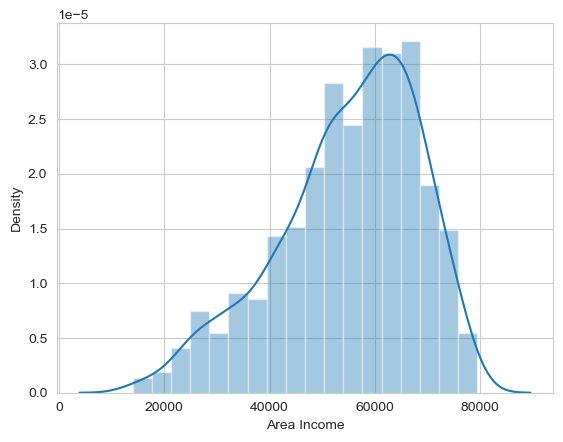

In [15]:
sns.distplot(data['Area Income'])

C:\Users\hkit\AppData\Local\Temp\ipykernel_18020\1298243121.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

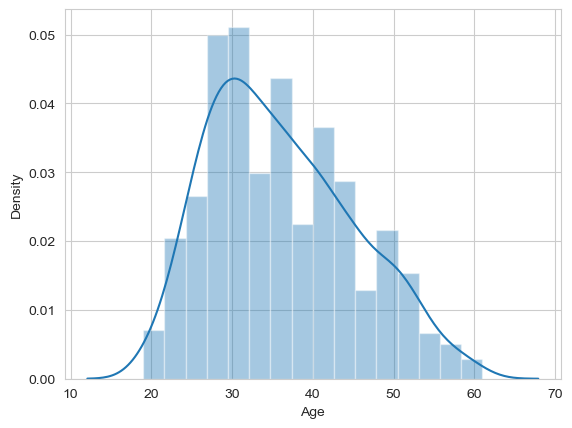

In [16]:
sns.distplot(data['Age'])

# 텍스트로 된 컬럼 확인

In [17]:
data['Country'].nunique()

237

In [18]:
data['City'].nunique()

969

In [19]:
data['Ad Topic Line'].nunique()

1000

# Missing Value 확인 및 처리

In [20]:
data.isna().sum() / len(data)

Daily Time Spent on Site    0.000
Age                         0.084
Area Income                 0.000
Daily Internet Usage        0.000
Ad Topic Line               0.000
City                        0.000
Male                        0.000
Country                     0.000
Timestamp                   0.000
Clicked on Ad               0.000
dtype: float64

In [21]:
data.dropna()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [22]:
data.drop('Age', axis=1)

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...
995,72.97,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [23]:
round(data['Age'].mean())

36

In [24]:
data['Age'].median()

35.0

In [25]:
data = data.fillna(round(data['Age'].mean()))

In [26]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,36.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [27]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# Train / Test 나누기

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# 로지스틱 리그레션 모델 만들기

In [51]:
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [52]:
# model = LogisticRegression()
model = DecisionTreeClassifier(max_depth=5)

In [53]:
model.fit(X_train, y_train)

In [54]:
# Coefficient 확인
model.coef_

# 예측 및 평가

In [44]:
pred = model.predict(X_test)

In [48]:
print("h")

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
accuracy_score(y_test, pred)

In [31]:
confusion_matrix(y_test, pred)

array([[92,  8],
       [12, 88]], dtype=int64)

In [ ]:
model.predict()

In [7]:
exec("a = [68.95, 36.0, 61833.90, 256.09]")


In [6]:
model.predict(a)

NameError: name 'model' is not defined

In [1]:
import win32com.client as win32

In [2]:
# %pip install pywin32

In [4]:
excel = win32.gencache.EnsureDispatch("Excel.Application")
wb = excel.Workbooks.Add()  # 파일을 열 때는 .Open(파일경로)
ws = wb.Worksheets(1)
excel.Visible = True

In [5]:
today = ws.Cells(1, 1).Value

In [6]:
today

pywintypes.datetime(2023, 5, 4, 0, 0, tzinfo=TimeZoneInfo('GMT Standard Time', True))

In [7]:
today.year

2023

In [12]:
today.day

4

In [13]:
import datetime as dt

In [14]:
dt.date.today()

datetime.date(2023, 5, 4)

In [15]:
after_30days = today + dt.timedelta(days=30)

In [16]:
after_30days

pywintypes.datetime(2023, 6, 3, 0, 0, tzinfo=TimeZoneInfo('GMT Standard Time', True))

In [26]:
today = "2023-05-04"
today = dt.datetime.strptime(today, "%Y-%m-%d")

In [27]:
target_day = "2024-02-26"
target_day = dt.datetime.strptime(target_day, "%Y-%m-%d")

In [28]:
target_day - today

datetime.timedelta(days=298)

In [30]:
today

datetime.datetime(2023, 5, 4, 0, 0)

In [33]:
ws.Cells(5, 5).Value = today.strftime("%Y-%m-%d")

In [34]:
from time import sleep
from random import randint, random

In [35]:
sec = 1
sleep(sec)

In [36]:
randint(1, 8)

8 3 8 8 7 1 7 4 3 5 5 1 6 6 2 3 2 4 2 7 1 5 6 3 4 8 5 6 1 1 2 3 8 2 4 4 8 1 4 5 3 7 2 3 2 4 6 6 1 3 7 4 7 7 7 4 1 2 4 6 2 2 1 3 7 6 4 4 7 2 4 6 3 4 4 3 3 8 3 3 8 8 5 2 8 8 7 3 3 1 5 3 1 2 1 7 5 4 2 5 

In [173]:
randint(1, 3) + random()

3.7961866690841397

In [175]:
import time

In [178]:
start_time = time.time()
sleep(randint(1, 3) + random())
end_time = time.time()
print(end_time - start_time)

2.9380042552948


In [185]:
%%timeit
sleep(randint(1, 3) + random())

2.95 s ± 729 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [184]:
%%time
sleep(1)

CPU times: total: 0 ns
Wall time: 1 s


In [187]:
a = [
    "830226-155252511",
    "2221`830226-1552-525",
    "123456-64324-631346",
    "a235623-4568454",
    "830226-1552525234",
    "123456-6432463",
]

In [191]:
print(qwer)

NameError: name 'qwer' is not defined

In [193]:
try:
    print(qwer)
except (NameError, IndexError) as e:
    print(e)
    print("네임에러가 떴습니다.")
except

name 'qwer' is not defined
네임에러가 떴습니다.


In [190]:
import re

pattern = re.compile(r"^\d{6}-\d{7}$")
for i in a:
    if pattern.match(i):
        print(i)

123456-6432463


In [199]:
import turtle as tt

In [200]:
tt.getcanvas()

<turtle.ScrolledCanvas object .!scrolledcanvas>

In [201]:
tt.circle(5)

In [202]:
tt.clear()

In [203]:
tt.forward(5)

In [2]:
import turtle as tt

In [7]:
tt.color('red', 'yellow')
tt.begin_fill()
while True:
    tt.forward(200)
    tt.left(170)
    if abs(tt.pos()) < 1:
        break
tt.end_fill()
tt.done()

Terminator: 

In [3]:
tt.forward(5000)

Terminator: 